[Domen Gorjup](http://www.ladisk.si/~gorjup), [Klemen Zaletelj](http://www.ladisk.si/~zaletelj), [prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)*
<br><br>
<center>
<img width=150 src="./figures/UNI-FS-full-en.png">
<br>
<font size=5 color="f00e0e" style="line-height: 150%;" face="garamond"><b>A Hands-on Tutorial on Open-Source Research in Structural Dynamics and Image-Based Experimental Modal Analysis</b></font>
<br>
<img width=300 src="./figures/39iPageHeader.png">
<font size=2>February 8-11 2021</font>

\* Corresponding email: janko.slavic@fs.uni-lj.si www.ladisk.si
    
Source of this tutorial: [github.com/ladisk/open_source_research_in_structural_dynamics](github.com/ladisk/open_source_research_in_structural_dynamics)
</center>

## Your hosts

<table style="width:60%; background-color:#ffffff">
    <tr>
        <td>
            <b><font size="4">Domen Gorjup, PhD student</font></b>
            <br><br>
            <font size="3">domen.gorjup@fs.uni-lj.si</font>
        </td>
        <td>
            <img src="figures/domen_gorjup.jpg" width=150>
        </td>
    </tr>
    <tr>
        <td>
            <b><font size="4">Klemen Zaletelj, PhD student</font></b>
            <br><br>
            <font size="3">klemen.zaletelj@fs.uni-lj.si</font>
        </td>
        <td>
            <img src="figures/klemen_zaletelj.jpg" width=150>
        </td>
    </tr>
    <tr>
        <td>
            <b><font size="4">Professor Janko Slavič, PhD</font></b>
            <br><br>
            <font size="3">janko.slavic@fs.uni-lj.si</font>
        </td>
        <td>
            <img src="figures/janko_slavic.jpg" width=150>
        </td>
    </tr>    
</table>

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Your-hosts" data-toc-modified-id="Your-hosts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Your hosts</a></span></li><li><span><a href="#Why-open-source?" data-toc-modified-id="Why-open-source?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Why open-source?</a></span><ul class="toc-item"><li><span><a href="#Avoid-re-inventing-the-wheel,-again!" data-toc-modified-id="Avoid-re-inventing-the-wheel,-again!-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Avoid re-inventing the wheel, again!</a></span></li><li><span><a href="#Fully-reproducible-science!" data-toc-modified-id="Fully-reproducible-science!-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fully reproducible science!</a></span></li><li><span><a href="#Faster-science!" data-toc-modified-id="Faster-science!-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Faster science!</a></span></li><li><span><a href="#The-possibility-to-contribute-&amp;-open-development" data-toc-modified-id="The-possibility-to-contribute-&amp;-open-development-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>The possibility to contribute &amp; open development</a></span></li><li><span><a href="#Why-Python?" data-toc-modified-id="Why-Python?-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Why Python?</a></span></li><li><span><a href="#Seven-Stages-of-Open-Software" data-toc-modified-id="Seven-Stages-of-Open-Software-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Seven Stages of Open Software</a></span></li></ul></li><li><span><a href="#Open-source-tools-for-structural-dynamics" data-toc-modified-id="Open-source-tools-for-structural-dynamics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Open-source tools for structural dynamics</a></span><ul class="toc-item"><li><span><a href="#SciPy" data-toc-modified-id="SciPy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><a href="https://www.scipy.org/" target="_blank">SciPy</a></a></span></li><li><span><a href="#PyFRF" data-toc-modified-id="PyFRF-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><a href="https://github.com/openmodal/pyFRF" target="_blank">PyFRF</a></a></span></li><li><span><a href="#PyEMA" data-toc-modified-id="PyEMA-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><a href="https://github.com/ladisk/pyEMA" target="_blank">PyEMA</a></a></span></li><li><span><a href="#PyIDI" data-toc-modified-id="PyIDI-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span><a href="https://github.com/ladisk/pyidi" target="_blank">PyIDI</a></a></span></li><li><span><a href="#FLife" data-toc-modified-id="FLife-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><a href="https://github.com/ladisk/FLife" target="_blank">FLife</a></a></span></li><li><span><a href="#pyExSi" data-toc-modified-id="pyExSi-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span><a href="https://github.com/ladisk/pyExSi" target="_blank">pyExSi</a></a></span></li><li><span><a href="#PyUFF" data-toc-modified-id="PyUFF-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span><a href="https://github.com/openmodal/pyuff" target="_blank">PyUFF</a></a></span></li></ul></li><li><span><a href="#High-speed-camera-measurements-in-structural-dynamics" data-toc-modified-id="High-speed-camera-measurements-in-structural-dynamics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>High-speed camera measurements in structural dynamics</a></span><ul class="toc-item"><li><span><a href="#Acquisition-parameters" data-toc-modified-id="Acquisition-parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Acquisition parameters</a></span></li><li><span><a href="#Lighting" data-toc-modified-id="Lighting-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Lighting</a></span></li><li><span><a href="#Surface-preperation" data-toc-modified-id="Surface-preperation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Surface preperation</a></span></li><li><span><a href="#Possible-errors" data-toc-modified-id="Possible-errors-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Possible errors</a></span><ul class="toc-item"><li><span><a href="#Out-of-focus-image" data-toc-modified-id="Out-of-focus-image-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Out of focus image</a></span></li><li><span><a href="#Improper-lighting" data-toc-modified-id="Improper-lighting-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Improper lighting</a></span></li></ul></li></ul></li><li><span><a href="#Real-life-example-of-image-based-vibration-measurement" data-toc-modified-id="Real-life-example-of-image-based-vibration-measurement-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Real-life example of image-based vibration measurement</a></span><ul class="toc-item"><li><span><a href="#Image-based-displacement-computation" data-toc-modified-id="Image-based-displacement-computation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Image-based displacement computation</a></span></li><li><span><a href="#Modal-Analysis---camera-data,-only" data-toc-modified-id="Modal-Analysis---camera-data,-only-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Modal Analysis - camera data, only</a></span></li><li><span><a href="#Modal-Analysis---Hybrid-method" data-toc-modified-id="Modal-Analysis---Hybrid-method-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Modal Analysis - Hybrid method</a></span></li></ul></li></ul></div>

Plotting and other settings:

In [1]:
# Ignore non-critical warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font_size = 15
fig_size = (16.0, 8.0)

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = fig_size
matplotlib.rcParams['font.size'] = font_size

---

## Why open-source?

### Avoid re-inventing the wheel, again!
<img width=400 src="https://miro.medium.com/max/1400/1*uelROBkMlKDIomBaa1kK9w.jpeg">
Source: https://miro.medium.com/max/1400/1*uelROBkMlKDIomBaa1kK9w.jpeg

### Fully reproducible science!

<img width=400 src="https://h-iq.com/wp-content/uploads/sites/4/2017/05/reinventing-the-wheel.jpg">
Source: https://h-iq.com/wp-content/uploads/sites/4/2017/05/reinventing-the-wheel.jpg

### Faster science!
<img width=600 src="./figures/tweet_flife.jpg">
<img width=250 src="./figures/tweet_pyexsi.jpg">

### The possibility to contribute & open development
[numpy](https://github.com/numpy/numpy)
<img width=600 src="./figures/numpy.jpg">
<img width=200 src="./figures/numpy2.jpg">

[scipy](https://github.com/scipy/scipy)
<img width=600 src="./figures/scipy.jpg">
<img width=200 src="./figures/scipy2.jpg">

### Why Python?

<img width=600 src="./figures/g_trends.png">

[source](https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=%2Fm%2F05z1_,%2Fm%2F053_x,%2Fm%2F0jgqg,%2Fm%2F07sbkfb)

Consistently rated among the *top 5 most popular programming languages*. See for example the [IEEE Spectrum list](https://spectrum.ieee.org/static/interactive-the-top-programming-languages-2020) or the [TIOBE Programming Community index](https://www.tiobe.com/tiobe-index/), or the [StackOverflow developer survey](https://insights.stackoverflow.com/survey/2019?utm_source=Iterable&utm_medium=email&utm_campaign=dev-survey-2019#technology)*.

6 reasons as seen by [Kayla Matthews](https://www.kdnuggets.com/2017/07/6-reasons-python-suddenly-super-popular.html):
1. Python Has a Healthy, Active and Supportive Community
2. Python Has Some Great Corporate Sponsors
3. Python Has Big Data
4. Python Has Amazing Libraries
5. Python Is Reliable and Efficient
6. Python Is Accessible

**Open-source, governed by [The Python Software Foundation](https://www.python.org/psf-landing/)**
<img width=600 src="./figures/licence.jpg">

**Simple syntax**

In [ ]:
# example from: https://jakevdp.github.io/WhirlwindTourOfPython/02-basic-python-syntax.html
# set the midpoint
midpoint = 5

# make two empty lists
lower = []; upper = []

# split the numbers into lower and upper
for i in range(10):
    if (i < midpoint):
        lower.append(i)
    else:
        upper.append(i)
        
print("lower:", lower)
print("upper:", upper)

**Huge, inclusive and growing ecosystem**
Currently, over 270k packages (https://pypi.org/). Steep growth in popularity in recent years.
<img width=700 src="./figures/psf.jpg">

**Why Structural Dynamics in Python?**

<img width=600 src="./figures/py_ecosys0.png">

<img width=600 src="./figures/py_ecosys1.png">

<img width=600 src="./figures/py_ecosys2.png">

<img width=600 src="./figures/py_ecosys3.png">

<img width=600 src="./figures/py_ecosys4.png">

<img width=600 src="./figures/py_ecosys5.png">

### Seven Stages of Open Software
By: [Matthew Rocklin](https://coiled.io/blog/stages-of-openness.html)

1. **Publicly visible source code**: We uploaded our code to GitHub
2. **Licensed for reuse**: And let people use it for free
2. **Accepting contributions**: And if they submit a patch, we’ll take the time to look at it, and work with them to merge it in
4. **Open development**: And when we work we’ll make sure that all of our communication happens in the open as well, so that others can see what we’re doing and why
5. **Open decision making**: And that communication will be open to the public, so that everyone can weigh in, vote, and determine what happens to the project
6. **Multi-institution engagement**: So much so that no single institution or individual has control over the project
7. **Retirement**: So now we can retire, and know that the software will live on forever

---

## Open-source tools for structural dynamics

To run this tutorial, the following Python packages must be installed:

* ``pip install scipy``
* ``pip install numpy``
* ``pip install matplotlib``
* ``pip install lvm_read``
* ``pip install pyFRF``
* ``pip install pyidi``
* ``pip install pyEMA``
* ``pip install FLife``
* ``pip install pyExSi``
* ``pip install pyuff``

You can get them all at once by running:

``pip install -r requirements.txt``

Package imports:

*(Some of these might be imported again in the examples below. While this is not a recommended practice, it is done to provide you with complete code examples).*

In [4]:
# General Python packages
import os
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, fixed

# Structural dynamics packages
import lvm_read
import pyFRF
import pyidi
import pyEMA
import FLife
import pyExSi as es
import pyuff

# Our visualization functions
from modules.tools import show_modal_data, plot_mode_shape, show_reconstructed, show_lighting

### [SciPy](https://www.scipy.org/)

The [SciPy](https://www.scipy.org/index.html) stack is a collection of open-source Python software for science and engineering. It consists of six core packages, including:

**[Numpy](http://www.numpy.org/)**: 

* Adds support for the efficient multidimentional ``ndarray`` data object for numerical data representation. 
* Functions for *numerical data manipulation*, *linear algebra* and *the Fourier transform*.

In [5]:
import numpy as np

In [7]:
L = [1, 2, 3, 4, 5] # This is a list
a = np.array(L)     # This is an array
a

array([1, 2, 3, 4, 5])

Note the difference:

In [9]:
2*L

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [10]:
2*a

array([ 2,  4,  6,  8, 10])

A range of numbers:

In [12]:
a1 = np.arange(0, 10, 2)
a1

array([0, 2, 4, 6, 8])

Linearly spaced values:

In [14]:
a2 = np.linspace(0, 10, 6, dtype=complex)
a2

array([ 0.+0.j,  2.+0.j,  4.+0.j,  6.+0.j,  8.+0.j, 10.+0.j])

Multidimensional arrays represent matrices:

In [16]:
M = np.random.rand(3, 3) # This is a matrix
M

array([[0.06891946, 0.27457214, 0.13576834],
       [0.05984589, 0.71998805, 0.90662062],
       [0.70497183, 0.63229087, 0.51723212]])

In [17]:
A = np.array([[1, 2, 3],
              [-4, 5.6, 8.5]])
A.dtype

dtype('float64')

**[Matplotlib](https://matplotlib.org/)**:

* A plotting library for producing publication-ready data visualizations.
* A MATLAB-inspired user interface.


In [18]:
import matplotlib.pyplot as plt

In [19]:
x = np.arange(0, 1, 0.02) # x coordinates
y1 = np.sin(2*np.pi*2*x)   # y coordinates
y2 = np.cos(2*np.pi*3*x)   # y coordinates

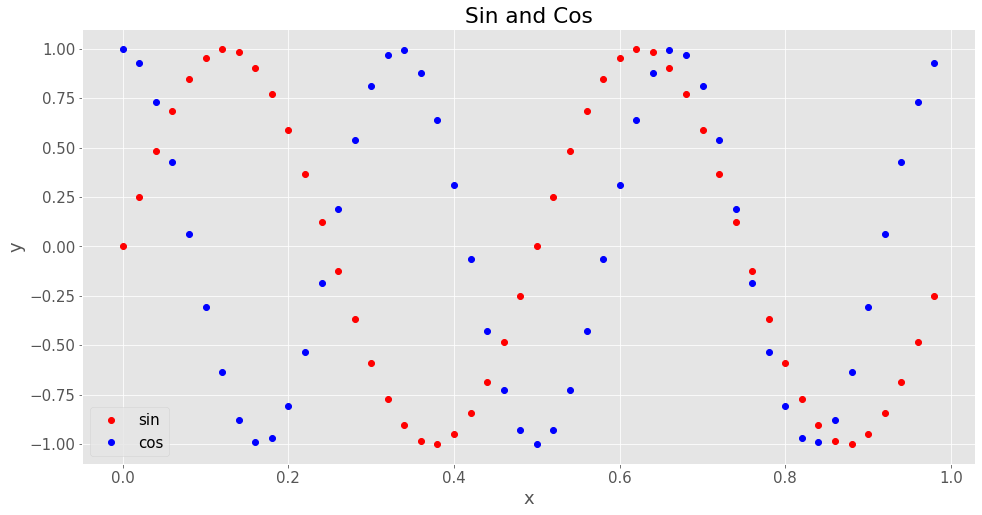

In [23]:
plt.plot(x, y1, 'ro', label='sin')
plt.plot(x, y2, 'bo', label='cos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin and Cos')
plt.grid(True)

(Outside the Jupyter environment, things are a bit different! Some extra lines of code are required.)

**[The SciPy library](https://docs.scipy.org/doc/scipy/reference/)** provides user-friendly and efficient numerical routines for:

* Signal processing,
* numerical integration,
* optimization,
* interpolation.

In [26]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [27]:
x_int = np.linspace(0, 1, 1000)
spl = InterpolatedUnivariateSpline(x, y1, k=3)

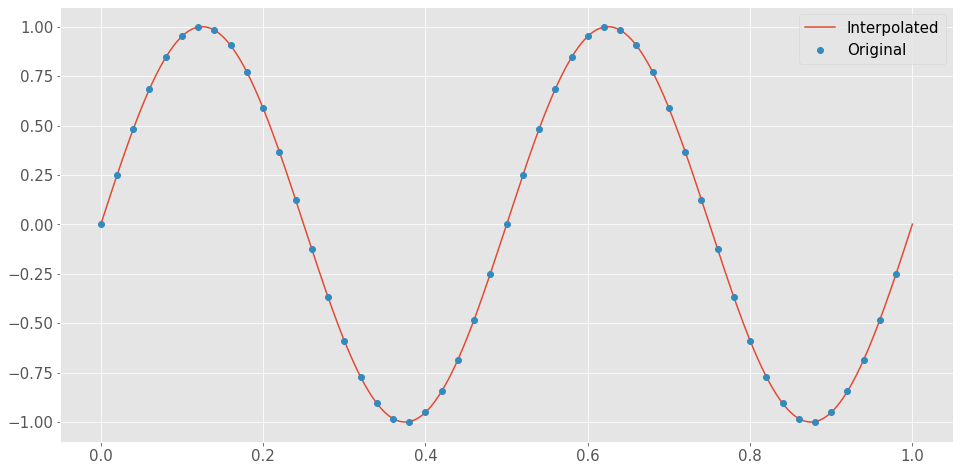

In [28]:
plt.plot(x_int, spl(x_int), '-', label='Interpolated')
plt.plot(x, y1, 'o', label='Original')
plt.legend()

The Discrete Fourier Transform is included in both Numpy and SciPy:

In [30]:
Y1 = np.fft.rfft(y1) / len(x) * 2
Y2 = scipy.fft.rfft(y2) / len(x) * 2
freq = np.fft.rfftfreq(len(x), d=x[1]-x[0])

(0.0, 5.0)

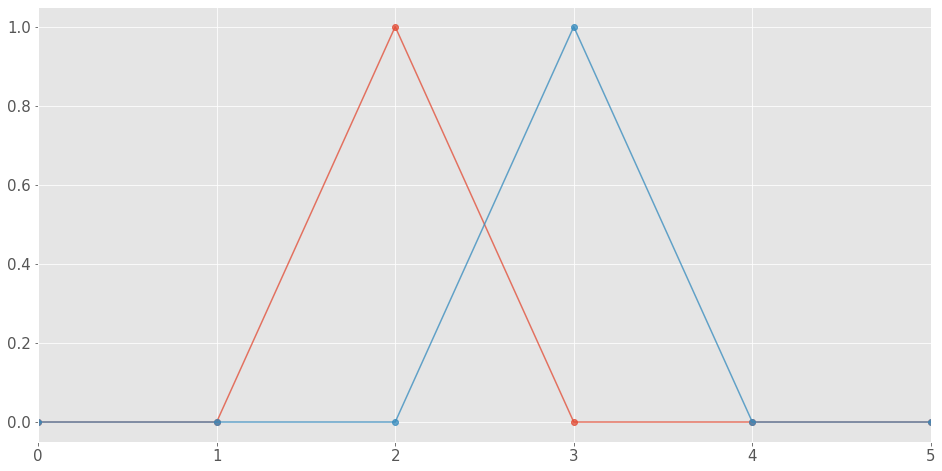

In [31]:
plt.plot(freq, np.abs(Y1), 'o-', alpha=0.75)
plt.plot(freq, np.abs(Y2), 'o-', alpha=0.75)
plt.xlim(0, 5)

---

### [PyFRF](https://github.com/openmodal/pyFRF)

``pyFRF`` is an open-source package, designed for Frequency Response Function measurements in structural dynamics.

The inputs are time signals of excitation and response, the outputs are FRF estimators (H1, H2, Hv, Vector or ODS) and coherence.

In [32]:
import pyFRF

In [34]:
measurement_dict = lvm_read.read('data/acceleration.lvm')

In [36]:
acceleration = measurement_dict[0]['data'][:, 0]
force = measurement_dict[0]['data'][:, 1]

sampling_frequency = 1/measurement_dict[0]['Delta_X'][0]

A direct way of computing the FRF estimates:

In [37]:
frf = pyFRF.FRF(sampling_freq=sampling_frequency, exc=force, resp=acceleration, 
          resp_type='a', exc_window='None', resp_window='None')

freq = frf.get_f_axis()
H1 = frf.get_FRF(type='H1')

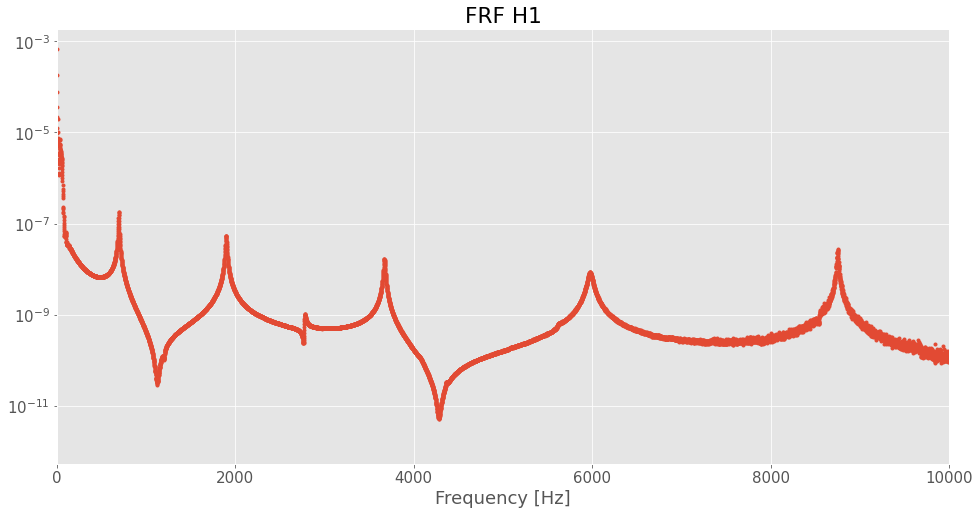

In [38]:
plt.semilogy(freq, np.abs(H1), '.')
plt.title('FRF H1')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 10000);

Different types of FRF:

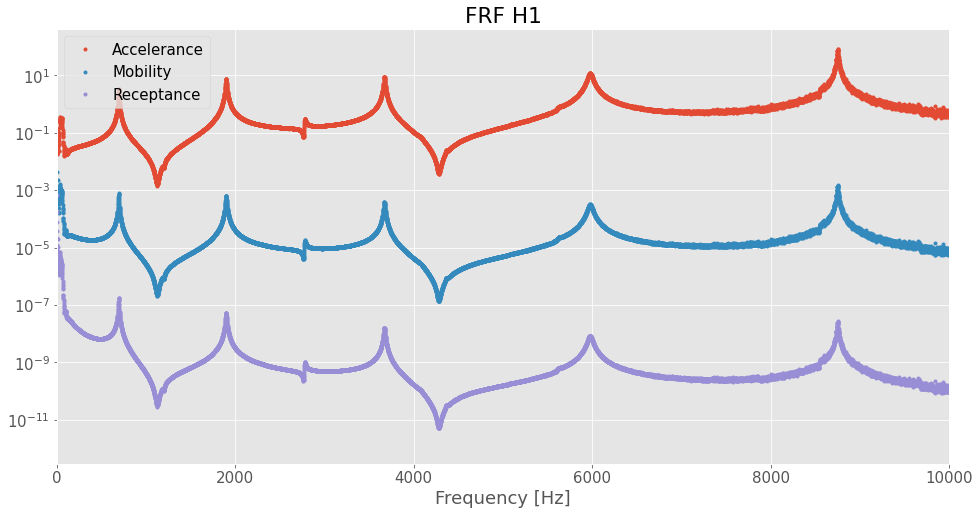

In [40]:
plt.semilogy(freq, np.abs(frf.get_FRF(form='accelerance')), '.', label='Accelerance')
plt.semilogy(freq, np.abs(frf.get_FRF(form='mobility')), '.', label='Mobility')
plt.semilogy(freq, np.abs(frf.get_FRF(form='receptance')), '.', label='Receptance')
plt.title('FRF H1')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 10000)
plt.legend();

`pyFRF` enables the averaging of multiple measurements:

In [41]:
measurement_dict['Segments'] # number of repeated measurements for averaing

1

In [42]:
n_averages = 1

In [43]:
frf = pyFRF.FRF(sampling_freq=sampling_frequency, 
                n_averages=n_averages,
                fft_len=force.shape[0],
                exc_type='f', 
                resp_type='a',
                weighting='Linear')

The averages are added sequentially, the FRF estimate is updated with each iteration:

In [45]:
for i in range(n_averages):
    force = measurement_dict[i]['data'][:, 1]
    acceleration = measurement_dict[i]['data'][:, 0]

    frf.add_data(force, acceleration)

In [46]:
freq_avg = frf.get_f_axis()
H1_avg = frf.get_FRF(type='H1')

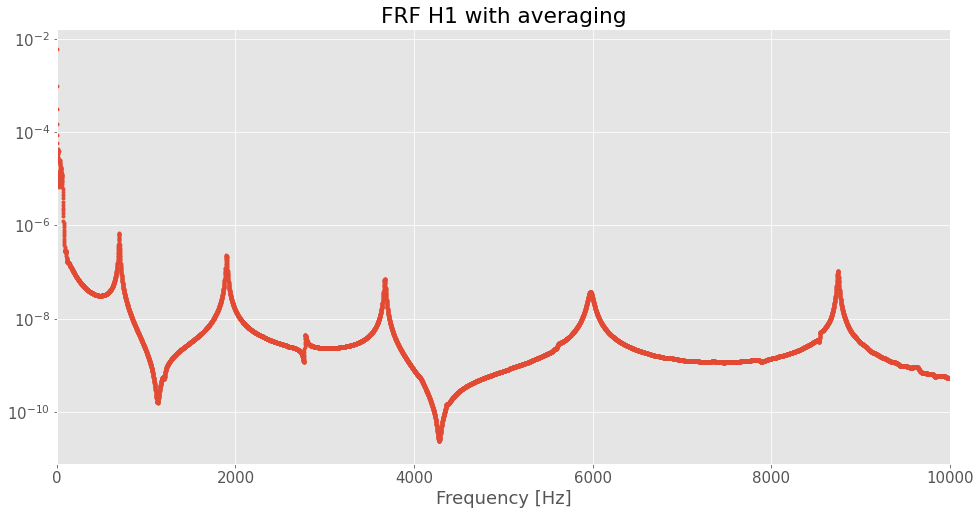

In [47]:
plt.semilogy(freq_avg, np.abs(H1_avg), '.')
plt.title('FRF H1 with averaging')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 10000);

### [PyEMA](https://github.com/ladisk/pyEMA)

In [49]:
freq, H1_main = np.load("./data/FRF_matrix.npy", allow_pickle=True)

From the experimental FRF array `H1_main` of dimensions: `(#inputs, #outputs, frequency)` only the response accelerometer position at index 1 will be used for analysis:

In [51]:
selected_response = 1
FRF = H1_main[:, selected_response, :]

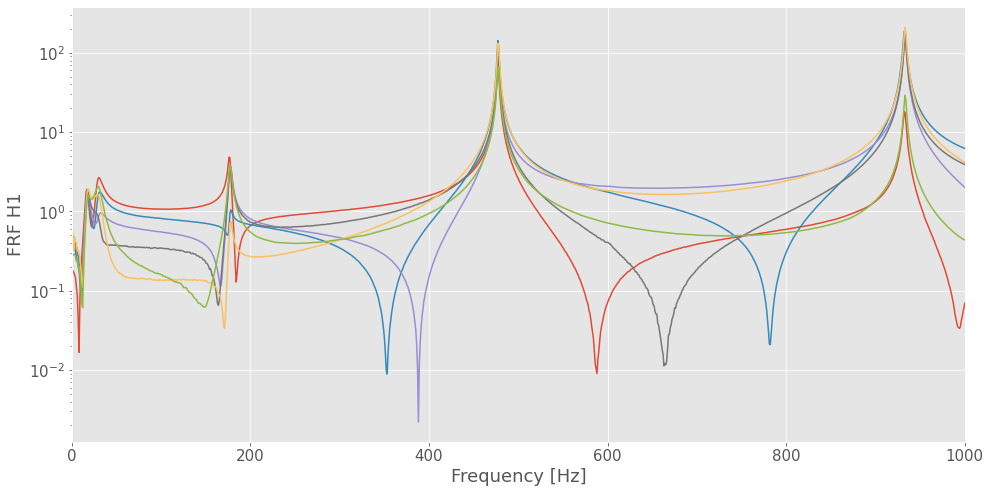

In [52]:
plt.semilogy(freq, np.abs(FRF.T));
plt.ylabel('FRF H1')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 1000);

Initiate the pyEMA object:

In [54]:
acc = pyEMA.Model(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

Get the complex system poles:

In [55]:
acc.get_poles()

100%|███████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 63.49it/s]


Select stable poles from stabilisation chart:

In [56]:
acc.select_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 124.04it/s]


<Figure size 1152x576 with 0 Axes>



FRF reconstruction:


In [58]:
frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all')



The selected natural frequencies and corresponding damping factors:


In [60]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.1	0.0088
2)  476.5	0.0019
3)  932.2	0.0014
4) 1534.8	0.0019
5) 2286.3	0.0028
6) 3162.0	0.0018
7) 4181.2	0.0016


Modal constants are of shape (`n_locations` $\times$ `n_frequencies`):

In [62]:
acc.A.shape

(6, 7)

Show normalized modes (first three):

Text(0, 0.5, 'mode shape')

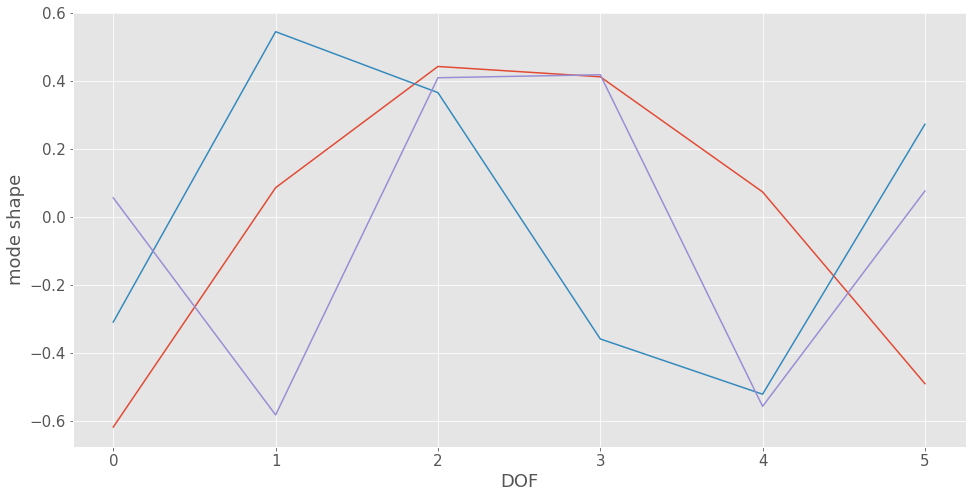

In [64]:
plt.plot(acc.normal_mode()[:, :3]);
plt.xlabel('DOF')
plt.ylabel('mode shape')

Check out the Auto Modal Assurance Criterion:

In [65]:
autoMAC = acc.autoMAC()

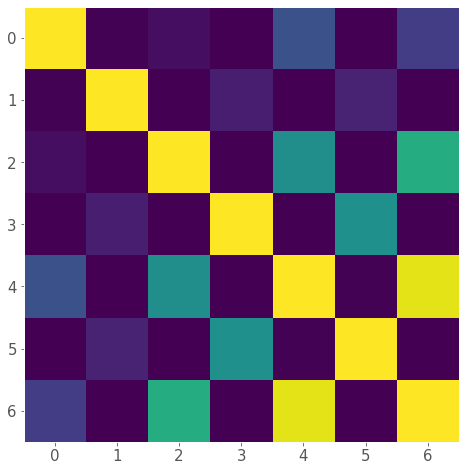

In [67]:
plt.figure(figsize=(8, 8))
plt.imshow(autoMAC)
plt.grid(False);



Showing the reconstructed FRF:


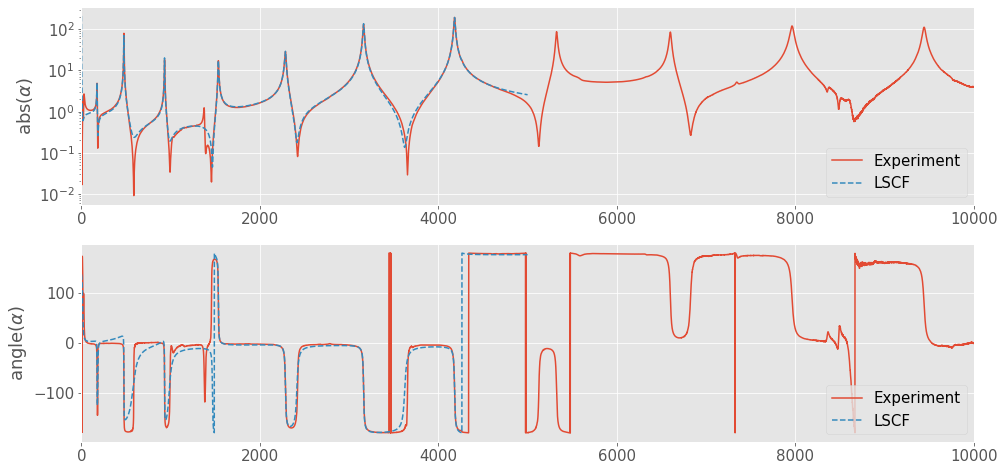

In [68]:
show_reconstructed(freq, acc, FRF, frf_rec)

### [PyIDI](https://github.com/ladisk/pyidi)

An Open-source package for Image-based Displacement Identification (IDI) implementation in Python.

Currently implements a Lucas-Kanade based DIC algorithm, and the [Simplified Optical Flow](http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=179) algorithm for image-based displacement identification.

Works with Photron MRAW high-speed imaging file format, but can easily be extended to different data structures.

Point to the location of image data:

In [70]:
cam_fname = 'data/camera.cih'

Create a `video` object:

In [71]:
video = pyidi.pyIDI(cam_fname)

The first frame of the video:

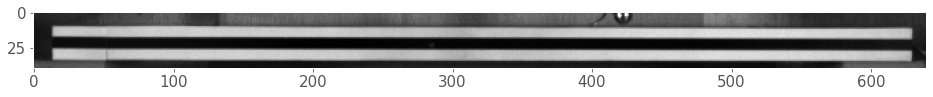

In [73]:
plt.imshow(video.mraw[100], 'gray')
plt.grid(False)

Define the point on the frame where the displacements will be identified:

In [74]:
points = [[25, 100], [25, 200]]

In [75]:
video.set_points(points)

Set the method of displacement identification:

In [77]:
video.set_method('sof')

Configure additional settings:

In [79]:
video.method.configure()

Compute the displacements:

In [80]:
disp = video.get_displacements()

100%|██████████████████████████████████████████████████████████| 3750/3750 [00:04<00:00, 808.90it/s]


Displacements have a shape: (`n_locations`, `n_frames`, `2`):

In [81]:
disp.shape

(2, 3750, 2)

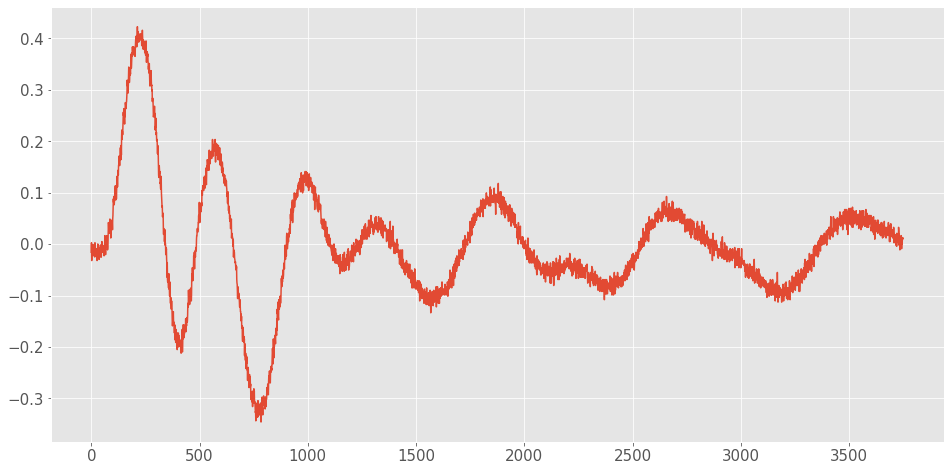

In [82]:
plt.plot(disp[1, :, 0])

### [FLife](https://github.com/ladisk/FLife)

Create random data as example of the response fatigue load:

In [ ]:
dt = 1e-4
x = np.random.normal(scale=100, size=10000)

Prepare spectral data which will later be used by different fatigue damage estimation methods  in the frequency-domain:

In [ ]:
sd = FLife.SpectralData(input=x, dt=dt)

Rainflow fatigue-damage estimator object (`sd` is an object with the time-domain data required for the Rainflow method):

In [ ]:
rf = FLife.Rainflow(sd)

We need to define fatigue parameters and can estimate the fatigue life:

In [ ]:
C = 1.8e+22
k = 7.3
rf.get_life(C = C, k=k)

Frequency-domain methods are as easy as the time-domain:

In [ ]:
dirlik = FLife.Dirlik(sd)
dirlik.get_life(C = C, k=k)

In [ ]:
tb = FLife.TovoBenasciutti(sd)
tb.get_life(C = C, k=k, method="method 2")

Supported frequency-domain methods are:
* Dirlik,
* Tovo Benasciutti,
* Zhao Baker,
* Narrowband,
* Alpha 0.75,
* Wirsching Light,
* Rice,
* Gao Moan,
* Petrucci Zuccarello.

### [pyExSi](https://github.com/ladisk/pyExSi)

Supported excitation signals:
<img width=300 src="./figures/tweet_pyexsi.jpg">

Here we will show only the **non-stationary non-Gaussian excitation**.

In [ ]:
N = 2 ** 16  # number of data points of time signal
fs = 1024  # sampling frequency [Hz]
t = np.arange(0, N) / fs  # time vector

# define frequency vector and one-sided flat-shaped PSD
M = N // 2 + 1  # number of data points of frequency vector
f = np.arange(0, M, 1) * fs / N  # frequency vector
f_min = 50  # PSD upper frequency limit  [Hz]
f_max = 100  # PSD lower frequency limit [Hz]
PSD = es.get_psd(f, f_min, f_max)  # one-sided flat-shaped PSD

In [ ]:
plt.plot(f, PSD)
plt.xlim(0, 200)
plt.show()

Get gaussian stationary signal and check if the kurtosis is close to 3:

In [ ]:
gausian_signal = es.random_gaussian(N, PSD, fs)
es.get_kurtosis(gausian_signal)

Get non-gaussian stationary signal and check if the kurtosis is close to `k_u=10`:

In [ ]:
k_u_target = 10
nongausian_signal = es.stationary_nongaussian_signal(N, PSD, fs, k_u=k_u_target)
es.get_kurtosis(nongausian_signal)

Two types of non-stationarity are supported:
* modulation defined with a PSD defined 
* modulation based on cubic spline interpolation (nodes are based on beta distribution).

Here the latter will be shown.

Get the non-stationary non-Gaussian signal and check the kurtosis:

In [ ]:
# Points are separated by delta_n = 2**8 samples (at fs=2**10)
delta_n = 2 ** 8
# define array of parameters alpha and beta
alpha_list = np.arange(1, 10, 1)
beta_list = np.arange(1, 10, 1)
# get signal
nongausian_nonstationary_signal_beta = es.nonstationary_signal(
    N,
    PSD,
    fs,
    k_u=k_u_target,
    modulating_signal=('CSI', delta_n),
    param1_list=alpha_list,
    param2_list=beta_list
)
# calculate kurtosis
es.get_kurtosis(nongausian_nonsttaionary_signal_beta)

Look at the results:

In [ ]:
t_indx = np.logical_and(t >= 0, t < 10)
plt.figure(figsize=(15, 5))
plt.plot(t[t_indx], gausian_signal[t_indx], label='Gaussian')
plt.plot(
    t[t_indx],
    10+nongausian_nonsttaionary_signal_beta[t_indx],
    label='non-Gaussian non-stationary (beta) + 10'
)
plt.legend();

Check the Power spectral density:

In [ ]:
plt.psd(gausian_signal, Fs=fs, label='Gaussian')
plt.psd(nongausian_nonsttaionary_signal_beta, Fs=fs, label='non-Gaussian non-stationary (beta)')
plt.legend();

### [PyUFF](https://github.com/openmodal/pyuff)

UFF file format was originally developed by the Structural Dynamics Research Corporation (SDRC) to standardize data transfer mainly between various modal analysis, measurement or CAD geometry software products. UFF file is composed into several datasets, most important being the dataset 58 for measurement data and dataset 55 for modal data. More info on specific datasets can be obtained at http://www.sdrl.uc.edu/sdrl/referenceinfo/universalfileformats

Supported data tipes for reading and writting are: 151, 15, 55, 58, 58b, 82, 164.

In [ ]:
pyuff._SUPPORTED_SETS

Example UFF data sets can be prepared with a *prepare...* methods. E.g. for the FRF data set 58:

In [ ]:
ds58 = pyuff.prepare_test_58()
ds58

Plot of the FRF:

In [ ]:
plt.plot(np.abs(ds58[0]['data']))

Saving just the first data-set to disk:

In [ ]:
import os
save_to_file = 'data/temp58.uff'
if os.path.exists(save_to_file):#uff always add data to the current file, 
    os.remove(save_to_file)     #therefore we delete prior file here
new_uff_file = pyuff.UFF(save_to_file)

In [ ]:
new_uff_file.write_sets(ds58[0])

---

## High-speed camera measurements in structural dynamics

**Excitation with modal hammer**

<video controls loop src="figures/experiment.mp4" width="100%" rotate="270deg"/>

Location of the selected files:

In [ ]:
cam_fname = 'data/camera.cih'
lvm_fname = 'data/acceleration.lvm'

Load the video using [pyidi][1] package.

[1]: https://github.com/ladisk/pyidi

In [ ]:
video = pyidi.pyIDI(cam_fname)

Images are stored in the ``mraw`` attribute.

In [ ]:
sequential_image_nr = 175
plt.imshow(video.mraw[sequential_image_nr], cmap='gray')
plt.grid(False)

*This example footage is for presentation purposes only and was made to be suitable for online sharing.*

*Normaly image acquisation parameters such as frame rate and image resolution would be chosen as high as possible to obtain more precise results.*

<video controls loop src="figures/video.MOV" width="950" rotate="270deg"/>

### Acquisition parameters

The parameters that were used when recording can be found in the ``info`` attribute:

In [ ]:
video.info['Record Rate(fps)']

In [ ]:
video.info['Shutter Speed(s)']

In [ ]:
video.info['Image Width']

In [ ]:
video.info['Image Height']

### Lighting
Lighting conditions are very important when using a high-speed camera. To obtain optimal lighting conditions, a histogram of pixel intensity is viewed. An example of a well balanced historgram is shown.

In [ ]:
selected_frame = 0
x0 = 300 # position of observed rectangle
y0, d = 9, 25
roi = video.mraw[selected_frame, y0:y0+d, x0:x0+d]

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].hist(roi.flatten(), bins=50);
# Formating
ax[0].add_patch(patches.Rectangle((x0, y0), d, d, fill=False, color='r', linewidth=2))
ax[0].grid(False)
ax[1].set_xlabel('Grayscale value [/]')
ax[1].set_ylabel('n pixels [/]')
plt.tight_layout()

### Surface preperation
In order for gradient-based methods to work, sufficient gradient must be present on the images. Surface preperations is therefor necessary.

Stripe pattern and random speckle pattern generation is implemented in the [speckle-pattern][1] python module. In this case, horizontal stripes were used.

[1]: https://github.com/ladisk/speckle_pattern

In [ ]:
grad0, grad1 = np.gradient(video.mraw[0].astype(float)) # gradient computation using Numpy

In [ ]:
x0 = 200 # position of cross section

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].plot(video.mraw[selected_frame, :, x0], label='Grayscale value')
ax[1].plot(grad0[:, x0], label='Gradient')
# Formating
ax[0].vlines(x0, 0, 40, colors='r', linewidth=3)
ax[0].text(x0+10, -5, 'Cross section')
ax[0].arrow(x0+50, 5, -35, 20, color='r', width=3)
ax[0].grid(False)
ax[1].set_xlabel('Image height [px]')
ax[1].set_ylabel('Grayscale/gradient value [/]')
plt.legend()
plt.tight_layout()

### Possible errors

#### Out of focus image
The right side of the beam is in focus, while the left side is not.

In [ ]:
layout_fname = r'data/focus.cih'
video_layout = pyidi.pyIDI(layout_fname)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(video_layout.mraw[0], 'gray')

# Formating
ax.grid(False)
plt.tight_layout()

#### Improper lighting

In [ ]:
light_fname = r'data/illumination.cih'
video_light = pyidi.pyIDI(light_fname)

In [ ]:
interact(show_lighting, x0=(75, 550, 50), video_light=fixed(video_light));

---

## Real-life example of image-based vibration measurement

### Image-based displacement computation

We are using the high-speed video file, loaded above:

In [ ]:
video.info

Select the points to be analyzed:

In [ ]:
video.info['Image Width']

In [ ]:
points_y = np.ones(10)*video.info['Image Height']//2
points_x = np.arange(30, video.info['Image Width'], (video.info['Image Width']-60)//9)
points = np.column_stack([points_y, points_x])
points

Configure the analysis:

In [ ]:
video.set_points(points)
video.set_method('lk', roi_size=(21, 23), max_nfev=10, int_order=3)

In [ ]:
video.show_points()

Compute the displacements:

In [ ]:
displacements = np.load('data/displacements_lk.npy', allow_pickle=True)

In [ ]:
# idisplacements = video.get_displaciments(processes=4) * 8e-5 # this might take a minute

In [ ]:
location = 0

In [ ]:
fig, ax = plt.subplots()
ax.plot(displacements[location, :, 0], label='Direction 0 (y)')
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

Compute the FRF using image-based displacement data

In [ ]:
N = int(video.info['Total Frame'])
dt = 1/int(video.info['Record Rate(fps)'])
T = dt*N

In [ ]:
upper_f_limit = 4000 # upper observed frequency

In [ ]:
freq_cam = np.fft.rfftfreq(N, dt)
fft_cam = np.fft.rfft(displacements[:, :, 0], N) *2/N 

Use only data below the selected upper frequency:

In [ ]:
fft_cam = np.copy(fft_cam[:, freq_cam<upper_f_limit])
freq_cam = np.copy(freq_cam[freq_cam<upper_f_limit])

The FFT of force measurement is (also limited to `upper_f_limit`):

In [ ]:
lvm = lvm_read.read(lvm_fname)
force = lvm[0]['data'][:-30, 1] # 30 pre-samples
N = len(force)//4 # the video was captured for 1/4 of a second
dt = lvm[0]['Delta_X'][1]

fft_force = np.fft.rfft(force, N) *2/N
freq_force = np.fft.rfftfreq(N, dt)

fft_force = np.copy(fft_force[freq_force<upper_f_limit])
freq_force = np.copy(freq_force[freq_force<upper_f_limit])

Since only one measurement was used, the FRF is determined by:

In [ ]:
frf_cam = fft_cam/fft_force 

In [ ]:
plt.semilogy(freq_cam, np.abs(frf_cam[location]));
plt.xlabel('Frequency [Hz]')
plt.ylabel('Receptance FRF')

### Modal Analysis - camera data, only

Modal analysis can be made using ``pyEMA`` package, accessible on [PyPI][1].

[1]: https://pypi.org/project/pyEMA/

In [ ]:
cam = pyEMA.Model(frf_cam, freq_cam, pol_order_high=100, upper=upper_f_limit)

Poles are computed:

In [ ]:
cam.get_poles(show_progress=True)

Stable poles can be picked in the stability chart, or preditermind by passing in approximate natural frequencies.

In [ ]:
cam.select_poles()

In [ ]:
cam.print_modal_data()

After the stable poles are determind, a ``lsfd`` method can be called to reconstruct the FRF:

In [ ]:
frf_rec, shapes_cam = cam.get_constants(FRF_ind='all')

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_cam[:-1], np.abs(frf_rec[location]), label='Reconstructed FRF', lw=2)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Receptance')
plt.legend();

In [ ]:
fig, ax = plt.subplots(shapes_cam.shape[1])
for i, a in enumerate(ax):
    plot_mode_shape(shapes_cam[:, i], axis=a, frequency=cam.nat_freq[i])

### Modal Analysis - Hybrid method

Hybrid method was developed by Javh et al. Further details can be found [here][1] ([pdf][2])

First, the acceleration and force data are needed:

[1]: https://www.sciencedirect.com/science/article/pii/S0888327017302637
[2]: http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=192

In [ ]:
hyb_acc = lvm[0]['data'][:-30, 0] * 9.81 # acceleration data (converted to m/s**2)

The FRF can be computed using ``pyFRF``:

In [ ]:
frf_ = pyFRF.FRF(
    sampling_freq=1/dt,
    exc=force,
    resp=hyb_acc,
    exc_window='None',
    resp_type='a',
    resp_window='None')

Only the frequencies lower than `upper_f_limit` Hz are observed:

In [ ]:
freq_acc = frf_.get_f_axis()
frf_acc = frf_.get_FRF(form='receptance')

frf_acc = frf_acc[freq_acc<upper_f_limit]
freq_acc = freq_acc[freq_acc<upper_f_limit]

The location of acceleration measurement is at identified camera point with index 3:

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF')
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.set_title('Camera-based response at accelerometer location')
plt.legend();

Next the ``lscf`` object can be created and poles are computed for the hybrid method:

In [ ]:
acc = pyEMA.Model(frf_acc[1:], freq_acc[1:], pol_order_high=50, upper=upper_f_limit)

In [ ]:
acc.get_poles(show_progress=True)

In [ ]:
acc.select_poles()

In [ ]:
acc.print_modal_data()

The poles computed based on accleration data are more reliable. These poles can now be used in reconstruction of FRFs from camera. A new ``lscf`` object is made with camera FRF:

In [ ]:
cam_hyb = pyEMA.Model(frf_cam, freq_cam)

Next, the reconstruction is done using accleration-determined poles:

In [ ]:
frf_hyb, shapes_hybrid = cam_hyb.get_constants(whose_poles=acc)

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.semilogy(freq_cam[:-1], np.abs(frf_hyb[location]), label='Reconstructed FRF', lw=3)
plt.legend();

In [ ]:
fig, ax = plt.subplots(shapes_cam.shape[-1])
for i, a in enumerate(ax):
    cam_freq = cam.nat_freq[i]
    hybrid_f_index = np.argmin(np.abs(acc.nat_freq - cam_freq))
    plot_mode_shape(shapes_hybrid[:, hybrid_f_index], axis=a, 
                    frequency=acc.nat_freq[hybrid_f_index], lw=2, label='Hybrid')
    plot_mode_shape(shapes_cam[:, i], axis=a , alpha=0.3, label='Camera')
    a.set_yticks([])
ax[0].legend()

In [ ]:
plt.figure(figsize=(fig_size[0], fig_size[1]/3))
plot_mode_shape(shapes_hybrid[:, -1], axis=plt.gca(), 
                frequency=acc.nat_freq[-1], lw=2, label='Hybrid')
plt.legend()

---

Interested in a potential summer school on open-source scientific computing?
http://tiny.cc/SummerInterest

<a href="http://tiny.cc/SummerInterest"><img src="figures/Summer School on High-speed Image Based Experimental Modal Analysis & Open Source Tools.png" width="90%"></a>
